# Assignment 2
## A binary classification example

loading dataset

In [1273]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from tensorflow.keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.utils.np_utils import to_categorical

In this first binary classification example, I will be using a credit default data set to predict whether someone will default.

In [1274]:

db=pd.read_csv("C:/Users/Aaron Shabanian/Documents/MachineLearning/MachineLearningAssignment2/UCI_Credit_Card.csv")
db.head()

predictors=["LIMIT_BAL", "EDUCATION", "SEX", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
           "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",  "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", 
           "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
z=StandardScaler()
x_train, x_test, y_train, y_test =train_test_split(db[predictors], db["default.payment.next.month"], test_size=.2)
x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_train

array([[5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.0000e+03, 5.0000e+03,
        2.0000e+03],
       [1.6000e+05, 2.0000e+00, 1.0000e+00, ..., 8.6000e+02, 0.0000e+00,
        0.0000e+00],
       [2.8000e+05, 1.0000e+00, 2.0000e+00, ..., 2.9000e+03, 2.5000e+03,
        2.6000e+03],
       ...,
       [2.9000e+05, 1.0000e+00, 1.0000e+00, ..., 8.8030e+03, 8.3000e+03,
        8.5460e+03],
       [5.0000e+04, 2.0000e+00, 1.0000e+00, ..., 1.8868e+04, 8.0600e+02,
        9.6800e+02],
       [3.0000e+04, 2.0000e+00, 1.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

In [1275]:
#(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)
db.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

I got the data performed a Train test split and then converted everything as a numpy array so it could get fed into the nueral network

Data is now ready to be fed into a nueral network

In [1276]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

Compiling the model

In [1277]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
             loss =losses.binary_crossentropy, 
             metrics=[metrics.binary_accuracy])

In [1278]:
x_val=x_train[:15000]
partial_x_train = x_train[15000:]
y_val=y_train[:15000]
partial_y_train = y_train[15000: ]


In [1279]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [1280]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512,
                   validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
18/18 [==============================] - 0s 8ms/step - loss: 1582.1689 - acc: 0.6438 - val_loss: 747.3137 - val_acc: 0.7031
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 671.1713 - acc: 0.6899 - val_loss: 560.6209 - val_acc: 0.7345
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 535.3598 - acc: 0.6947 - val_loss: 526.8539 - val_acc: 0.5915
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 484.2681 - acc: 0.6884 - val_loss: 507.4767 - val_acc: 0.7525
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 427.4031 - acc: 0.6948 - val_loss: 600.3404 - val_acc: 0.7670
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 402.9106 - acc: 0.7033 - val_loss: 457.7888 - val_acc: 0.5483
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 370.6941 - acc: 0.6911 - val_loss: 539.9381 - val_acc: 0.7710
Epoch 8/20
18/18 [==============================] - 0s 3ms/st

[430.03070068359375, 0.7681666612625122]

Plotting Training and validation loss

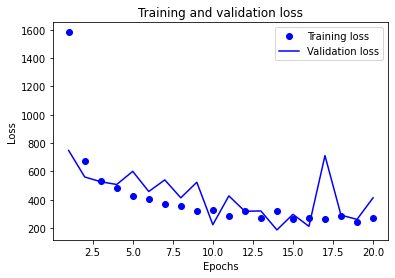

In [1281]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

While I can see that the training loss decreases as time goes on, the same can't be said about the validation loss which might signal some overfitting as the model is performing better on the training set than on the validation set

Plot Training and Validation accuracy

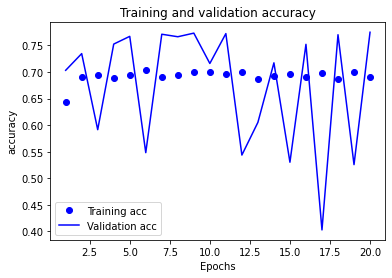

In [1282]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

I can see that the validation accuracy of the model swings around as more epochs are added while the training accuracy increases very slightly. This can signal that there is not much benefit of more epochs.

Retraining the model from scratch with 4 EPochs

In [1283]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results=model.evaluate(x_test, y_test)
results

Epoch 1/5
47/47 [==============================] - 0s 761us/step - loss: 757.5351 - accuracy: 0.6768
Epoch 2/5
47/47 [==============================] - 0s 761us/step - loss: 436.9210 - accuracy: 0.6852
Epoch 3/5
47/47 [==============================] - 0s 761us/step - loss: 309.5598 - accuracy: 0.6852
Epoch 4/5
47/47 [==============================] - 0s 714us/step - loss: 222.1983 - accuracy: 0.6866
Epoch 5/5
188/188 [==============================] - 0s 497us/step - loss: 188.2017 - accuracy: 0.4852


[188.2017364501953, 0.48516666889190674]

This is an example that shows that less epochs can have a similar or much higher accuracy than more epochs since data that is good on the training set is not always good on the validation set. This model does not even seem to make the training data much bettwe with each epoch while the validation accuracy is swinging wildly around

### Further expiriments
1. Using 1 or 3 hidden layers instad of 2

In [1284]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512,
                   validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
18/18 [==============================] - 0s 7ms/step - loss: 10547.9238 - accuracy: 0.3740 - val_loss: 6848.9941 - val_accuracy: 0.4680
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 5235.9565 - accuracy: 0.5069 - val_loss: 3760.7161 - val_accuracy: 0.5548
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 2822.4702 - accuracy: 0.5932 - val_loss: 2044.4542 - val_accuracy: 0.6419
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 1802.1321 - accuracy: 0.6730 - val_loss: 1580.0139 - val_accuracy: 0.7019
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 1417.2784 - accuracy: 0.6918 - val_loss: 1286.3024 - val_accuracy: 0.6634
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 1153.3193 - accuracy: 0.6978 - val_loss: 1101.4219 - val_accuracy: 0.7221
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 990.9727 - accuracy: 0.7063 - val_loss: 941.6229 - 

[403.0932922363281, 0.7254999876022339]

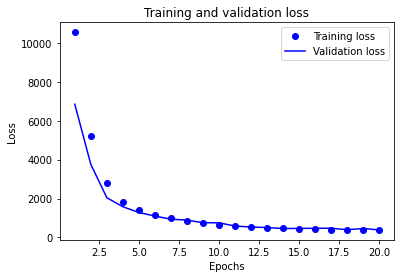

In [1285]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

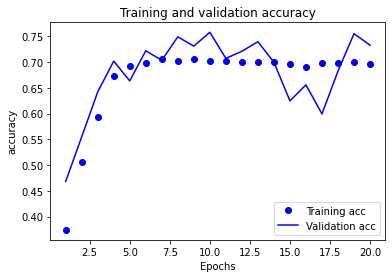

In [1286]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Using only 1 hidden layer is pretty similar if not a little better than our model from before. This helps demonstrate that more layers is not always better

In [1287]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512,
                   validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
18/18 [==============================] - 1s 8ms/step - loss: 899.9918 - accuracy: 0.7201 - val_loss: 442.4793 - val_accuracy: 0.7333
Epoch 2/20
18/18 [==============================] - 0s 3ms/step - loss: 315.1893 - accuracy: 0.6813 - val_loss: 244.6055 - val_accuracy: 0.7091
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 219.0180 - accuracy: 0.6948 - val_loss: 165.8742 - val_accuracy: 0.7163
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 172.0663 - accuracy: 0.6879 - val_loss: 147.5805 - val_accuracy: 0.5963
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 147.2095 - accuracy: 0.6924 - val_loss: 196.1342 - val_accuracy: 0.7635
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 132.6437 - accuracy: 0.6996 - val_loss: 140.9670 - val_accuracy: 0.7487
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 111.0147 - accuracy: 0.6917 - val_loss: 175.8635 - val_accuracy:

[70.14796447753906, 0.7609999775886536]

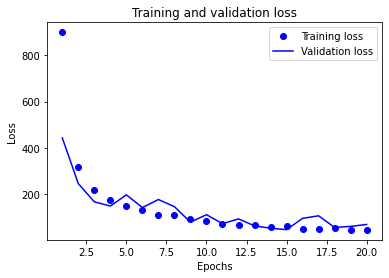

In [1288]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

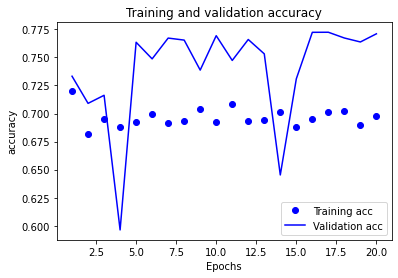

In [1289]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Accuracy of this model does not change much with the third layer added to this model. This further shows that the number of hidden layers is not always so important

2. Using Layers with hidden or fewer units: eg 32, 64

In [1290]:
model=models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
47/47 [==============================] - 0s 3ms/step - loss: 1643.8715 - accuracy: 0.6894 - val_loss: 1684.1818 - val_accuracy: 0.7793
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 863.6080 - accuracy: 0.6855 - val_loss: 1935.4717 - val_accuracy: 0.7799
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 719.6313 - accuracy: 0.6961 - val_loss: 1073.6594 - val_accuracy: 0.3381
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 726.4856 - accuracy: 0.6820 - val_loss: 303.1936 - val_accuracy: 0.6823
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 615.4434 - accuracy: 0.6895 - val_loss: 574.0370 - val_accuracy: 0.7790
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 595.9399 - accuracy: 0.6892 - val_loss: 463.7474 - val_accuracy: 0.7775
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 520.2571 - accuracy: 0.6914 - val_loss: 484.5416 - val_accur

[621.4498901367188, 0.7696666717529297]

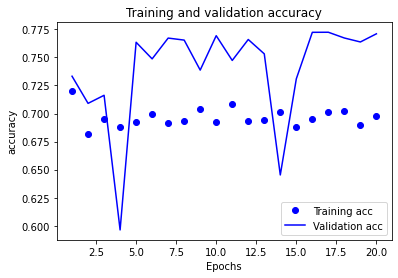

In [1291]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

3. Using mse instead of binary_crossentropy

In [1292]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(23,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='mse',
             metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
47/47 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 2/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 3/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 4/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 5/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 6/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 7/20
47/47 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.7810 - val_loss: 0.2198 - val_accuracy: 0.7802
Epoch 8/20
47/47 [==

[0.22966666519641876, 0.7703333497047424]

Using MSE instead of cross entropy did not change the accuracy by much. Typically MSE is worse on classification models than cross entropy is since it assumes that it is a normal distribution. Also the accuracy doesn't swing nearly as much

4. Use tanh instead of relu in activation function

In [1293]:
model=models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape=(23,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation= 'sigmoid'))
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)
results=model.evaluate(x_test, y_test)
results

Epoch 1/20
47/47 [==============================] - 0s 732us/step - loss: 0.5476 - accuracy: 0.7655
Epoch 2/20
47/47 [==============================] - 0s 717us/step - loss: 0.5281 - accuracy: 0.7782
Epoch 3/20
47/47 [==============================] - 0s 695us/step - loss: 0.5232 - accuracy: 0.7796
Epoch 4/20
47/47 [==============================] - 0s 736us/step - loss: 0.5207 - accuracy: 0.7806
Epoch 5/20
47/47 [==============================] - 0s 739us/step - loss: 0.5193 - accuracy: 0.7808
Epoch 6/20
47/47 [==============================] - 0s 741us/step - loss: 0.5177 - accuracy: 0.7808
Epoch 7/20
47/47 [==============================] - 0s 714us/step - loss: 0.5167 - accuracy: 0.7808
Epoch 8/20
47/47 [==============================] - 0s 739us/step - loss: 0.5159 - accuracy: 0.7809
Epoch 9/20
47/47 [==============================] - 0s 720us/step - loss: 0.5158 - accuracy: 0.7809
Epoch 10/20
47/47 [==============================] - 0s 716us/step - loss: 0.5151 - accuracy: 0.7810

[0.5265856981277466, 0.7703333497047424]

Using tanh has helped out model with a slightly higher accuracy score and I can see that it doesn't swing nearly as much but rather just levels off

## A Multiclass classification model

In [1258]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [1259]:
db=pd.read_csv("C:/Users/Aaron Shabanian/Documents/MachineLearning/MachineLearningAssignment2/abalone.csv")
db.head()
len(db)

4177

In [1260]:
db.dropna()
len(db)
db.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

Encoding the Sex column as integer categories so it can be fed through the neural network

In [1261]:
db.dtypes
db["Sex"].value_counts()
db["Sex"] = db["Sex"].astype('category')
db['Sex_code']=db["Sex"].cat.codes

In [1262]:
db.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_code  
0         0.150     15         2  
1         0.070      7         2  
2         0.210      9         0  
3         0.155     10         2  
4         0.055      7         1

In [1263]:
predictors=["Length", "Diameter", "Height", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
x_train, x_test, y_train, y_test =train_test_split(db[predictors], db["Sex_code"], test_size=.2)
x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
len(x_train)

3341

setting y_train and y_test as categorical

In [1264]:
import tensorflow as tf
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)


Building the model

In [1265]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(7,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

Compiling the model

In [1266]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'], 
    )

Validation set

In [1267]:
x_val = x_train[:2500]
partial_x_train = x_train[2500:]
y_val = y_train[:2500]
partial_y_train = y_train[2500:]
partial_x_train.shape


(841, 7)

Training the model


In [1269]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
2/2 [==============================] - 0s 39ms/step - loss: 1.0589 - accuracy: 0.4245 - val_loss: 1.0526 - val_accuracy: 0.3776
Epoch 2/20
2/2 [==============================] - 0s 19ms/step - loss: 1.0471 - accuracy: 0.4209 - val_loss: 1.0440 - val_accuracy: 0.4124
Epoch 3/20
2/2 [==============================] - 0s 20ms/step - loss: 1.0439 - accuracy: 0.4518 - val_loss: 1.0475 - val_accuracy: 0.3796
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 1.0491 - accuracy: 0.4293 - val_loss: 1.0480 - val_accuracy: 0.3776
Epoch 5/20
2/2 [==============================] - 0s 20ms/step - loss: 1.0446 - accuracy: 0.4269 - val_loss: 1.0427 - val_accuracy: 0.4052
Epoch 6/20
2/2 [==============================] - 0s 20ms/step - loss: 1.0378 - accuracy: 0.4400 - val_loss: 1.0366 - val_accuracy: 0.4484
Epoch 7/20
2/2 [==============================] - 0s 19ms/step - loss: 1.0354 - accuracy: 0.4340 - val_loss: 1.0387 - val_accuracy: 0.5136
Epoch 8/20
2/2 [===========

I can immediately see that the accuracy is much better than a random guess which would have been at .33

Plotting training and validation loss

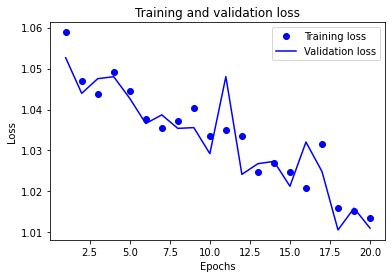

In [1270]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

I can see that the training and validation loss are decreasing with epoch which means that this model is not overfit since both the validation loss and training loss are decreasing

Plotting training and validation accuracy

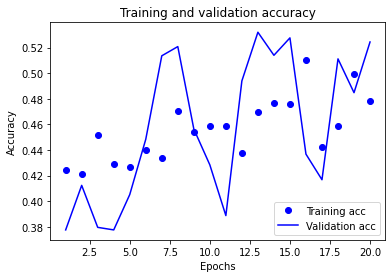

In [1271]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

While the validation and traing accuracy in this is jumping around I can still see a general up-trend in both accuracies

Retraining the model

In [1119]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(7,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results


Epoch 1/9
4/4 [==============================] - 1s 33ms/step - loss: 1.1165 - accuracy: 0.3422 - val_loss: 1.0776 - val_accuracy: 0.3593
Epoch 2/9
4/4 [==============================] - 0s 7ms/step - loss: 1.0819 - accuracy: 0.3585 - val_loss: 1.0812 - val_accuracy: 0.3620
Epoch 3/9
4/4 [==============================] - 0s 7ms/step - loss: 1.0754 - accuracy: 0.3552 - val_loss: 1.0853 - val_accuracy: 0.4027
Epoch 4/9
4/4 [==============================] - 0s 7ms/step - loss: 1.0739 - accuracy: 0.3900 - val_loss: 1.0671 - val_accuracy: 0.3627
Epoch 5/9
4/4 [==============================] - 0s 6ms/step - loss: 1.0701 - accuracy: 0.3449 - val_loss: 1.0636 - val_accuracy: 0.4893
Epoch 6/9
4/4 [==============================] - 0s 7ms/step - loss: 1.0606 - accuracy: 0.4264 - val_loss: 1.0784 - val_accuracy: 0.3667
Epoch 7/9
4/4 [==============================] - 0s 7ms/step - loss: 1.0636 - accuracy: 0.4117 - val_loss: 1.0577 - val_accuracy: 0.5073
Epoch 8/9
4/4 [=========================

[1.0368638038635254, 0.43421053886413574]

While the accuracy of predicting the sex category is low, it is better than a random guess which would be only .33. I can also see that it is improving with each epoch. This also shows that more epochs is beneficial for this model as the accuracy at 20 epochs was much higher than it was at 9

Generating predictions

In [1127]:

predictions = model.predict(x_test)
predictions

array([[0.32623664, 0.29599836, 0.37776503],
       [0.33672205, 0.27075985, 0.3925181 ],
       [0.35097188, 0.21205726, 0.43697086],
       ...,
       [0.3363444 , 0.26981193, 0.39384368],
       [0.33205104, 0.28562108, 0.38232788],
       [0.32800186, 0.29835463, 0.37364352]], dtype=float32)

Bottleneck information 

In [1128]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(7,)))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=128,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
15/15 [==============================] - 0s 7ms/step - loss: 1.2974 - accuracy: 0.3683 - val_loss: 1.1071 - val_accuracy: 0.3667
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1011 - accuracy: 0.3379 - val_loss: 1.0995 - val_accuracy: 0.3247
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0992 - accuracy: 0.3308 - val_loss: 1.0991 - val_accuracy: 0.3100
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3400 - val_loss: 1.0989 - val_accuracy: 0.3100
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0982 - accuracy: 0.3400 - val_loss: 1.0987 - val_accuracy: 0.3100
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0977 - accuracy: 0.3357 - val_loss: 1.0986 - val_accuracy: 0.3100
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0973 - accuracy: 0.3547 - val_loss: 1.0985 - val_accuracy: 0.3620
Epoch 8/20
15/15 [==

[1.0973566770553589, 0.3779904246330261]

I can see that the accuracy is much lower now because of the bottleneck and is now almost the same as a random guess

## A Regression example

Continuing from the same dataset as the multiclassification model, I will be building a regression model to determine the length of an albacore

In [1153]:
db.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_code  
0         0.150     15         2  
1         0.070      7         2  
2         0.210      9         0  
3         0.155     10         2  
4         0.055      7         1

In [1154]:
predictors=["Sex_code", "Diameter", "Height", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
x_train, x_test, y_train, y_test =train_test_split(db[predictors], db["Length"], test_size=.2)
x_train


Sex_code  Diameter  Height  Shucked weight  Viscera weight  \
3288         0     0.475   0.145          0.4695          0.2250   
2268         0     0.445   0.175          0.3465          0.1890   
3259         2     0.505   0.165          0.6145          0.3035   
2116         1     0.225   0.050          0.0675          0.0385   
2088         0     0.575   0.215          0.8565          0.4825   
...        ...       ...     ...             ...             ...   
2959         0     0.525   0.160          0.4975          0.3190   
2002         1     0.270   0.085          0.0905          0.0340   
1539         1     0.260   0.090          0.0715          0.0495   
3817         2     0.385   0.120          0.2890          0.0905   
2372         0     0.325   0.110          0.1450          0.0725   

      Shell weight  Rings  
3288         0.270     15  
2268         0.295     13  
3259         0.390     18  
2116         0.045      6  
2088         0.602     12  
...            ...    ...  
2959         0.394     13  
2002         0.053      7  
1539         0.058      7  
3817         0.153      8  
2372         0.110     12  

[3341 rows x 7 columns]

Normalizing the data

In [1155]:
zScore=StandardScaler()
x_train=zScore.fit_transform(x_train)
x_test=zScore.fit_transform(x_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Defining the model. I'm using a function since we are likely going to have to build it multiple times. No activation is used since it would constrain the range of outputs

In [1157]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using K-Fold validation

In [1158]:
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

In [1159]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
        x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                validation_data=(val_data, val_targets),
                epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Plotting validation scores

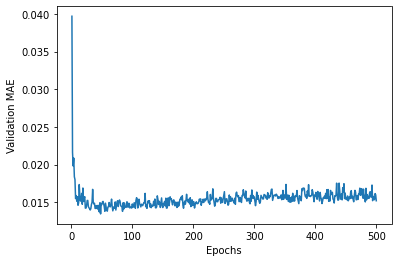

In [1160]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

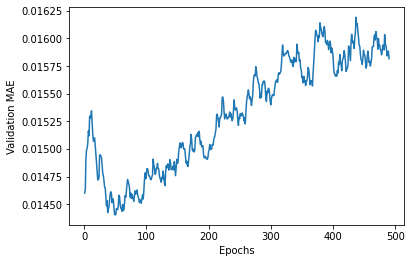

In [1161]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

The Validation MAE stops getting better after around 60 epochs, so there is not need to go past that

In [1167]:
model = build_model()
model.fit(x_train, y_train,
    epochs=60, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mae_score

27/27 [==============================] - 0s 629us/step - loss: 3.6256e-04 - mae: 0.0150


0.01500716619193554